In [2]:
import json
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
# from torch.utils.data import DataLoader
# from torchvision.models import vgg19
# import torch
# from torch.utils import data as data_utils

import tensorflow as tf


columns = ['opp_switch', 'opp_damage_dealt', 'opp_effectiveness', 'opp_damage_taken', 'opp_heal', 'opp_faint', 'opp_boost_off', 'opp_boost_def', 'opp_boost_spe', 'opp_unboost_off', 'opp_unboost_def', 'opp_unboost_spe', 'opp_basepower', 'opp_accuracy', 'opp_stab', 'opp_priority', 'opp_first', 'switch', 'damage_dealt', 'effectiveness', 'damage_taken', 'heal', 'faint', 'boost_off', 'boost_def', 'boost_spe', 'unboost_off', 'unboost_def', 'unboost_spe', 'basepower', 'accuracy', 'stab', 'priority', 'first', 'turn', 'turn_norm', 'opp_alive', 'alive', 'weight', 'winner', 'opp_winner', 'opp_usage']


In [25]:
with open('datasets/clean/images.json') as fl:
  _data = json.load(fl)

train_images, train_labels, train_poke = list(zip(
  *[(np.array(img), label, poke) for img, label, poke in
    zip(_data['train_images'], _data['train_labels'], _data['train_poke'])
    if np.array(img).shape == np.array(_data['train_images'][0]).shape]
))

test_images, test_labels, test_poke = zip(
	*[(np.array(img), label, poke) for img, label, poke in
	  zip(_data['test_images'], _data['test_labels'], _data['test_poke'])
    if np.array(img).shape == np.array(_data['test_images'][0]).shape]
)

train_labels, test_labels = np.array(train_labels), np.array(test_labels)

In [26]:
print(len(train_images))
print(len(_data['train_images']))
print(len(test_images))
print(len(_data['test_images']))


7519
7521
2336
2336


(array([ 66.,  90.,  90., 154.,  88., 179., 209., 353., 301., 806.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

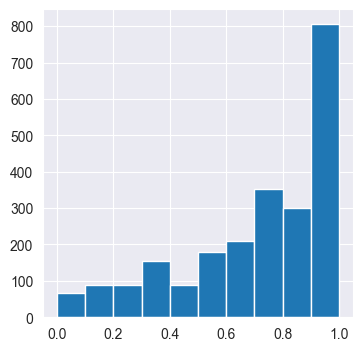

In [27]:
plt.figure(figsize=(4, 4))
plt.hist(test_labels)

(array([ 180.,  354.,  104.,  331.,  335.,  376., 2719., 1329., 1076.,
         715.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

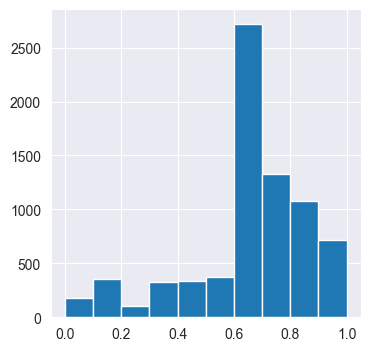

In [24]:
plt.figure(figsize=(4, 4))
plt.hist(train_labels)

,opp_switch,opp_damage_dealt,opp_effectiveness,opp_damage_taken,opp_heal,opp_faint,opp_boost_off,opp_boost_def,opp_boost_spe,opp_unboost_off,...,priority,first,turn,turn_norm,opp_alive,alive,weight,winner,opp_winner,opp_usage
0,1.000000,0.804689,0.961185,0.800596,0.681973,0.338653,0.924984,0.939655,0.958984,1.000000,...,0.381885,0.982747,0.238602,0.229463,1.000000,1.000000,1.000000,0.998836,0.994212,0.977905
1,0.803687,0.834896,0.963490,0.826087,0.883855,0.466985,0.974578,0.996408,1.000000,0.946470,...,0.556119,0.981840,0.428970,0.423205,0.915960,0.918452,0.995778,0.999566,0.993444,0.995796
2,0.760702,0.877175,0.968138,0.857219,0.955619,0.581844,1.000000,1.000000,0.998828,0.941394,...,0.684029,0.984852,0.625560,0.614263,0.819978,0.825189,0.993264,0.995975,0.997220,1.000000
3,0.733269,0.914094,0.977106,0.904419,1.000000,0.709126,0.951657,0.956897,0.937500,0.930318,...,0.878774,1.000000,0.826292,0.805933,0.708943,0.712137,0.992582,0.993332,1.000000,0.992028
4,0.689455,1.000000,1.000000,1.000000,0.900131,1.000000,0.853720,0.766523,0.760156,0.910475,...,1.000000,0.967628,1.000000,1.000000,0.578260,0.579317,0.989973,1.000000,0.992988,0.988442


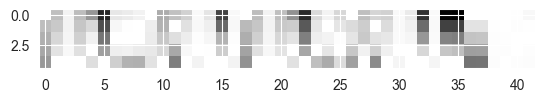

In [7]:
all_images = np.concatenate((train_images, test_images), axis=0)
img = np.mean(all_images, axis=0)
display(pd.DataFrame(img / img.max(axis=0) , columns=columns))
plt.imshow(img / img.max(axis=0), cmap='gray')

train_images = [x / img.max(axis=0) for x in train_images]
test_images = [x / img.max(axis=0) for x in test_images]
train_images, test_images = np.array(train_images), np.array(test_images)


In [9]:
print(type(train_images))
train_images = train_images.reshape(len(train_labels), 5, 42, 1)
test_images = test_images.reshape(len(test_labels), 5, 42, 1)

<class 'numpy.ndarray'>


In [10]:
rating_map = {'S': 1, 'S-': 0.95, 'A+': 0.85, 'A': 0.75, 'A-': 0.65, 'B+': 0.55, 'B': 0.45, 'B-': 0.35, 'C+': 0.2, 'C': 0.1, 'C-': 0}
# rating_map_reverse = {1: 'S', 0.95: 'S-', 0.85: 'A+', 0.75: 'A', 0.65: 'A-', 0.55: 'B+', 0.45: 'B', 0.35: 'B-', 0.2: 'C+', 0.1: 'C', 0: 'C-'}
rating_map_reverse = {1: 0, 0.95: 1, 0.85: 2, 0.75: 3, 0.65: 4, 0.55: 5, 0.45: 6, 0.35: 7, 0.2: 8, 0.1: 9, 0: 10}

save_train_labels = train_labels
save_test_labels = test_labels

# change the number to label
train_labels = np.array([rating_map_reverse[i] for i in train_labels])
test_labels = np.array([rating_map_reverse[i] for i in test_labels])

In [11]:
print(test_labels)

[4 3 7 ... 3 1 3]


In [14]:
import keras
from sklearn.metrics import r2_score
from keras.callbacks import EarlyStopping
from keras import Sequential

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

from sklearn.metrics import accuracy_score


# cnn regression model
model = Sequential()
model.add(Conv2D(32, (2, 6), activation='relu', input_shape=(5, 42, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (2, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(11, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


early_stop = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(train_images, train_labels, epochs=100, batch_size=128, validation_split=0.3, callbacks=[early_stop])

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

# r2 score
pred = model.predict(test_images)
pred = tf.math.argmax(pred, axis=1)
# print(pred.shape)
# print(test_labels.shape)

display(pred)
display(test_labels)

print(np.count_nonzero(np.array(test_labels) == pred) / len(test_labels))

Epoch 1/100
41/41 [==============================] - 2s 17ms/step - loss: 2.2385 - accuracy: 0.2320 - val_loss: 1.9264 - val_accuracy: 0.3642
Epoch 2/100
41/41 [==============================] - 0s 11ms/step - loss: 1.9503 - accuracy: 0.3502 - val_loss: 1.7122 - val_accuracy: 0.4666
Epoch 3/100
41/41 [==============================] - 0s 11ms/step - loss: 1.7940 - accuracy: 0.4225 - val_loss: 1.5940 - val_accuracy: 0.5122
Epoch 4/100
41/41 [==============================] - 1s 14ms/step - loss: 1.6786 - accuracy: 0.4703 - val_loss: 1.4595 - val_accuracy: 0.5361
Epoch 5/100
41/41 [==============================] - 0s 11ms/step - loss: 1.5658 - accuracy: 0.5007 - val_loss: 1.3807 - val_accuracy: 0.5727
Epoch 6/100
41/41 [==============================] - 0s 11ms/step - loss: 1.4879 - accuracy: 0.5258 - val_loss: 1.2979 - val_accuracy: 0.5794
Epoch 7/100
41/41 [==============================] - 0s 11ms/step - loss: 1.4027 - accuracy: 0.5560 - val_loss: 1.2255 - val_accuracy: 0.6106
Epoch 

<tf.Tensor: shape=(2470,), dtype=int64, numpy=array([4, 0, 0, ..., 4, 4, 4], dtype=int64)>

array([4, 3, 7, ..., 3, 1, 3])

0.18866396761133603


In [93]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['r2_score']
val_acc = history.history['val_r2_score']
epochs = range(1, len(train_loss) + 1)

fig, ax = plt.subplots(1, 2, figsize=(15, 8))

ax[0].plot(epochs[1:], train_loss[1:], 'bo', label='Training loss')
ax[0].plot(epochs[1:], val_loss[1:], 'b', label='Validation loss')
ax[0].set_title('Training and validation loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(epochs[1:], train_acc[1:], 'bo', label='Training R2')
ax[1].plot(epochs[1:], val_acc[1:], 'b', label='Validation R2')
ax[1].set_title('Training and validation R2')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('R2')
ax[1].legend()

plt.show()


KeyError: 'r2_score'

In [15]:
from itertools import groupby
groups = groupby(sorted(zip(test_images, test_labels, test_poke), key=lambda x: x[-1]), key=lambda x: x[-1])

pred = []
true = []

for k, v in groups:
	images = []
	for data in v:
		true_ = data[1]
		images.append(data[0])

	pred.append(np.mean(tf.math.argmax(model.predict(np.array(images)), axis=1)))
	true.append(true_)


1/1 [==============================] - 0s 19ms/step


In [16]:
list(zip(true, pred))

[(7, 0.7014925373134329),
 (9, 6.111111111111111),
 (3, 3.0144927536231885),
 (6, 4.928571428571429),
 (3, 4.582191780821918),
 (5, 2.506726457399103),
 (10, 0.0),
 (7, 1.9130434782608696),
 (4, 4.270588235294118),
 (4, 2.734042553191489),
 (8, 4.9411764705882355),
 (7, 3.6153846153846154),
 (8, 5.105263157894737),
 (2, 2.1733333333333333),
 (9, 3.9375),
 (10, 4.642857142857143),
 (4, 4.460251046025105),
 (4, 3.7837837837837838),
 (6, 3.1875),
 (9, 3.7777777777777777),
 (10, 3.9285714285714284),
 (10, 3.466666666666667),
 (5, 1.9836065573770492),
 (9, 2.75),
 (6, 3.5),
 (8, 3.342857142857143),
 (4, 3.9473684210526314),
 (9, 3.4615384615384617),
 (7, 4.0),
 (1, 2.0861244019138754),
 (4, 5.0)]